#### <font color='purple'><b>Import Libraries :
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### <font color='purple'><b>Load the dataset :

In [103]:
bike = pd.read_csv('bike_rent.csv')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


### <font color='magenta'><b>Data Preprocessing :

#### <font color='hotpink'><b>Check for special characters in the dataset and replace it with nan :

In [104]:
bike.replace('[~`!@#$%^&*()_+{}\[\]:;"\'<>,?/\\|]', np.nan, regex=True, inplace=True)

In [4]:
bike.isna().sum().sum()

48

In [5]:
bike.isnull().sum().sort_values(ascending=False)

temp          11
hum            6
season         6
atemp          6
workingday     5
windspeed      5
weathersit     4
yr             1
mnth           1
registered     1
holiday        1
casual         1
instant        0
dteday         0
weekday        0
hr             0
cnt            0
dtype: int64

#### <font color='hotpink'><b>Removing the reduntant columns :

In [105]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,16
1,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,40
2,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,NaN,0,32
3,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,13
4,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,1


#### <font color='hotpink'><b>Check for Duplicates :

In [10]:
bike.duplicated().sum()

2

In [11]:
bike[bike.duplicated(keep=False)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7958,winter,2011,12,6,No,6,No work,Clear,0.24,0.2576,0.65,0.1045,1,10,11
8126,winter,2011,12,6,No,6,No work,Clear,0.24,0.2576,0.65,0.1045,1,10,11
13559,fall,2012,7,4,No,2,Working Day,Clear,0.66,0.6061,0.83,0.0896,0,6,6
13727,fall,2012,7,4,No,2,Working Day,Clear,0.66,0.6061,0.83,0.0896,0,6,6


In [106]:
bike.drop_duplicates(keep='first',inplace=True)

In [13]:
bike[bike.duplicated(keep=False)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### <font color='magenta'><b>Exploratory Data Analysis :

In [36]:
bike.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [37]:
bike.shape

(17377, 13)

In [38]:
len(bike)

17377

In [39]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      17371 non-null  object
 1   yr          17376 non-null  object
 2   mnth        17376 non-null  object
 3   hr          17377 non-null  int64 
 4   holiday     17376 non-null  object
 5   weekday     17377 non-null  int64 
 6   workingday  17372 non-null  object
 7   weathersit  17373 non-null  object
 8   temp        17366 non-null  object
 9   atemp       17371 non-null  object
 10  hum         17371 non-null  object
 11  windspeed   17372 non-null  object
 12  cnt         17377 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.9+ MB


In [83]:
bike.dtypes

season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
cnt            int64
dtype: object

In [107]:
bike[['temp','atemp','hum','windspeed']] = bike[['temp','atemp','hum','windspeed']].apply(pd.to_numeric)

In [108]:
bike.dtypes

season         object
yr             object
mnth           object
hr              int64
holiday        object
weekday         int64
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [109]:
df = bike.copy()

In [142]:
df.select_dtypes(include='float64').describe()

,temp,atemp,hum,windspeed
count,17366.000000,17371.000000,17371.000000,17372.000000
mean,0.497137,0.475856,0.627195,0.190091
std,0.192522,0.171828,0.192944,0.122324
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


#### <font color='purple'><b>Univariate analysis :

#### <font color='orange'><b><I> To impute the missing values in numerical columns :

#### <font color='maroon'><b>Histogram :

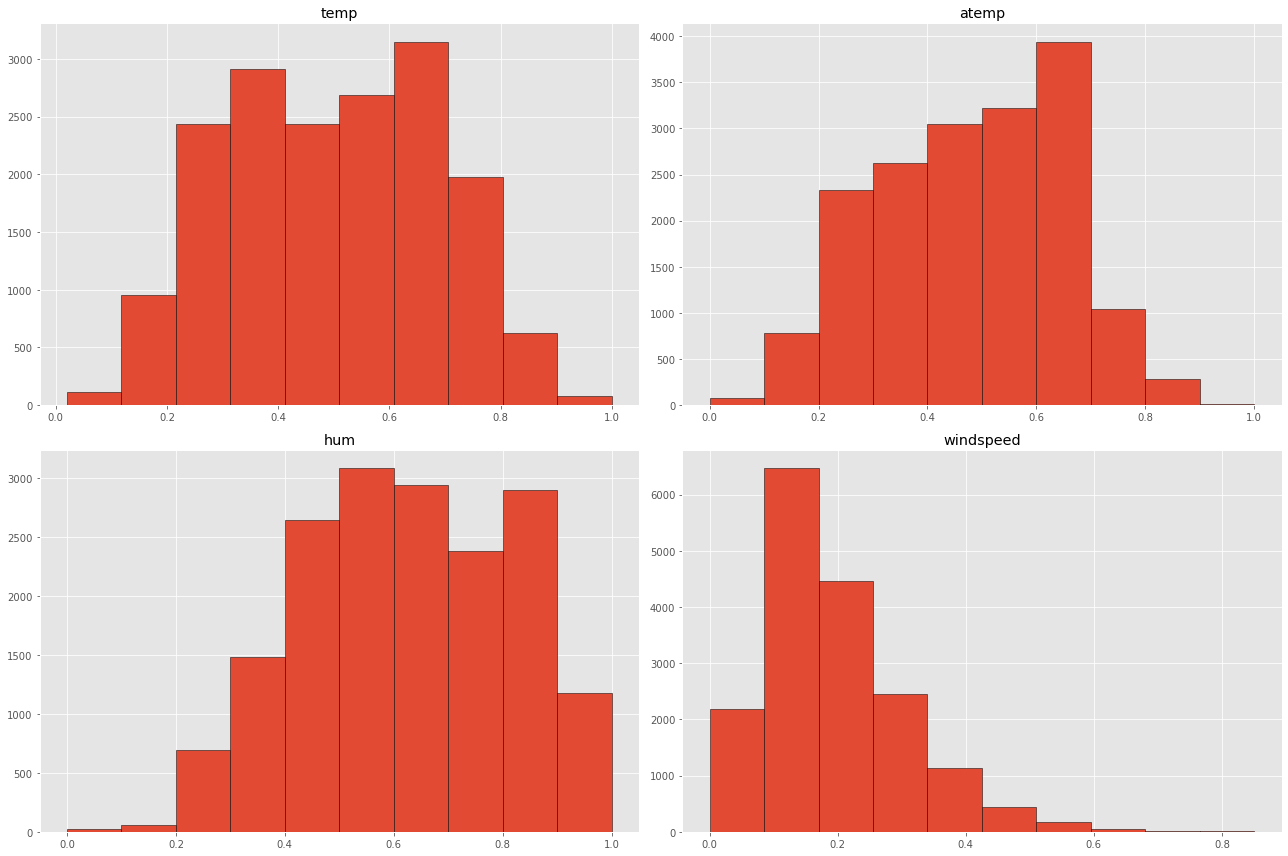

In [137]:
df.select_dtypes(include='float64').hist(edgecolor='k',figsize=(18,12))
plt.tight_layout();

<font color='brown'><b><I> From the plots, temp and atemp are normally distributed and humidity and windspeed look left and right-skewed. 

<font color='brown'><b><I>So using mean value to impute the missing values of temp and atemp and median value to impute the missing values of humidity and windspeed.

In [88]:
df[['temp','atemp']] = df[['temp','atemp']].fillna(df[['temp','atemp']].mean()) 

In [89]:
df[['hum','windspeed']] = df[['hum','windspeed']].fillna(df[['hum','windspeed']].median()) 

<font color='brown'><b><I>Impute missing values of categorical columns with mode

In [90]:
cols = ['season','workingday','weathersit','yr','mnth','holiday']
df[cols] = df[cols].fillna(df.mode().iloc[0])

In [49]:
df.isna().sum().sum()

0

#### <font color='orange'><b>Check for Outliers :

#### <font color='maroon'><b>Box plot :

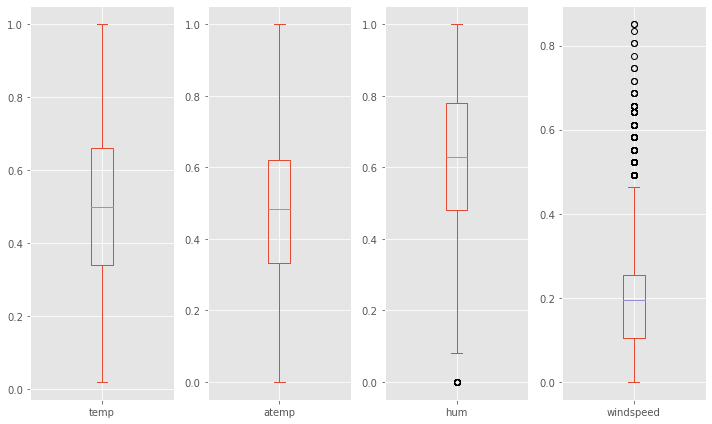

In [138]:
df.select_dtypes(include='float64').plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

<font color='brown'><b><I> There is one outlier on the humidity column on the lower side and a few a outliers on the windspeed column on the higher side.

#### <font color='purple'><b>Bivariate analysis :

#### <font color='maroon'><b>Scatter plot :

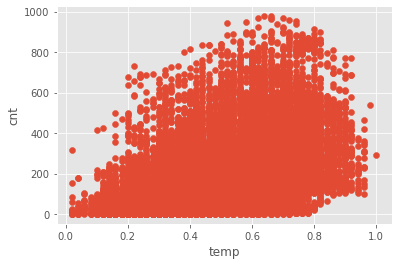

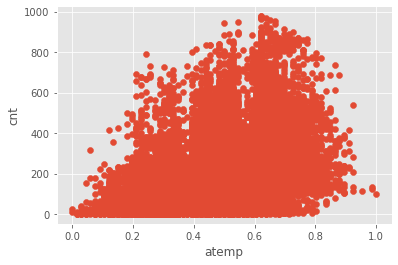

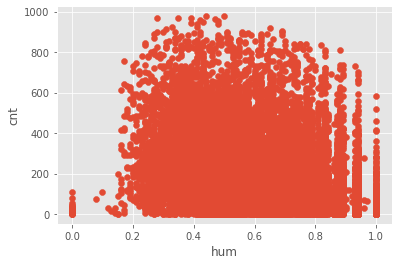

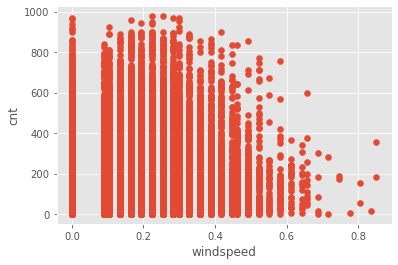

In [132]:
dependent_var = "cnt"
independent_vars = ['temp','atemp','hum','windspeed']


for var in independent_vars:
    plt.scatter(df[var],df[dependent_var])
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

<font color='brown'><b><I>From the plots, count and windspeed and count and humidity have no linear relationship. cnt and temp and atemp have slightly linear relationship.

#### <font color='maroon'><b>Pairplot :

<Figure size 1440x1440 with 0 Axes>

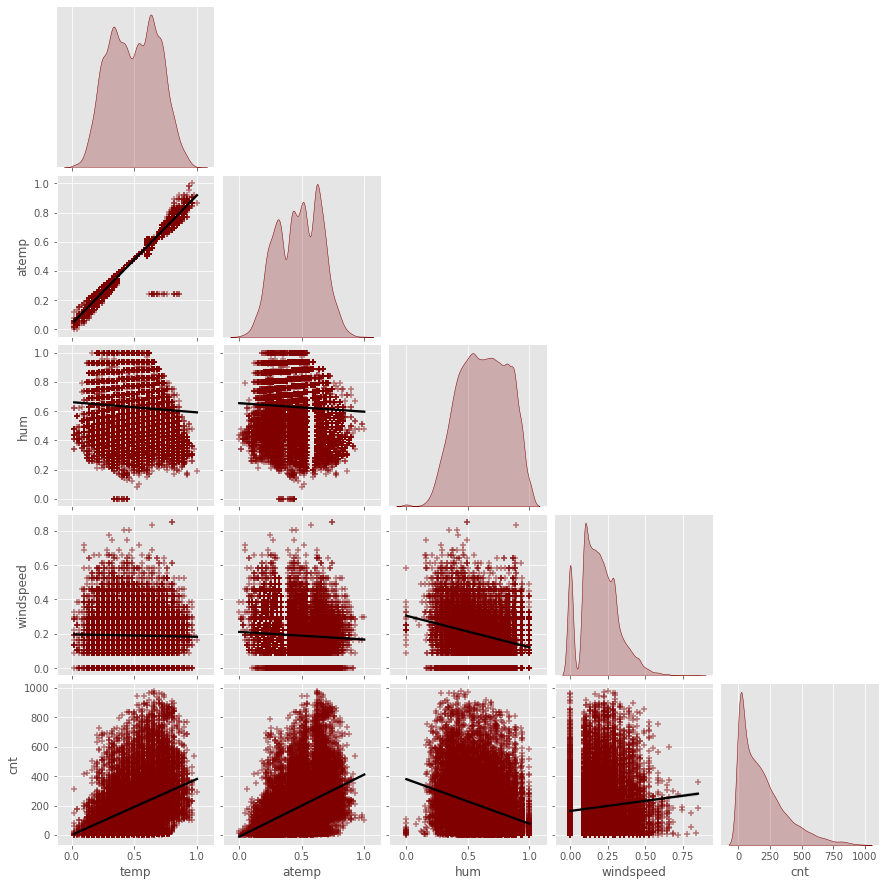

In [139]:
plt.figure(figsize=(20,20))
sns.pairplot(df.select_dtypes(include='float64').join(y),markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'black'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'maroon'}},
               corner=True,
                 diag_kws= {'color': 'maroon'})
plt.show()

#### <font color='maroon'><b>Heatmap :

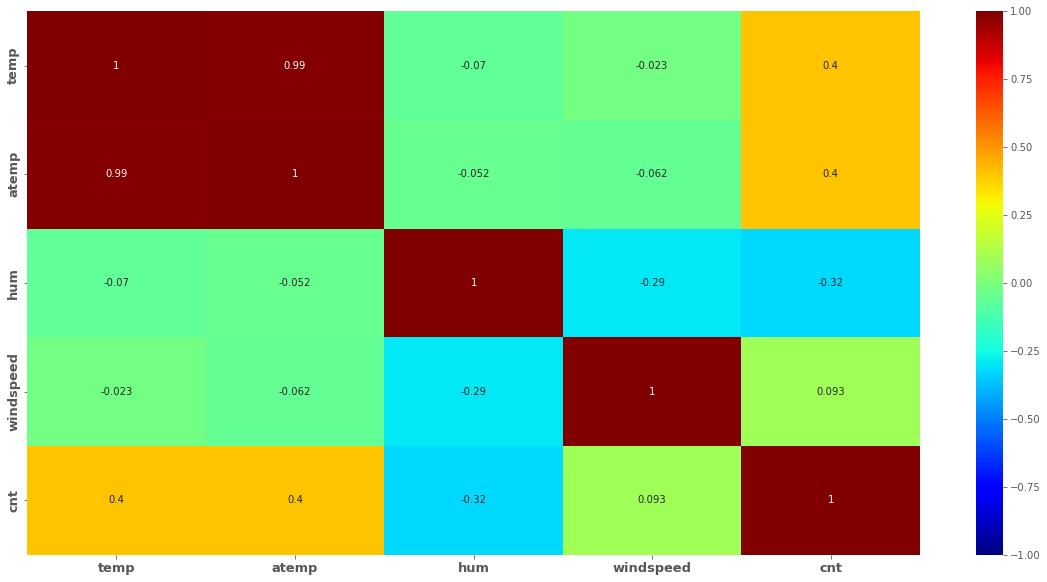

In [136]:
correlation = df.select_dtypes(include='float64').join(y).corr()
plt.figure(figsize=(20,10))
ax=sns.heatmap(data=correlation,annot=True,vmax=1,vmin=-1,cmap='jet')
plt.xticks(fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold');

<font color='brown'><b><I>From the above plots, temp and atemp are strongly correlated to each other. And none of the independent variables are strongly correlated with the dependent variable count.

#### <font color='purple'>Check for Multicollinearity :
- <font color='peach'><b><I>You can detect high-multi-collinearity by inspecting the eigen values of correlation matrix. A very low eigen value shows that the data are collinear, and the corresponding eigen vector shows which variables are collinear.

- <font color='peach'><b><I>If there is no collinearity in the data, you would expect that none of the eigen values are close to zero

In [140]:
w, v = np.linalg.eig(correlation)
w

array([2.28513799, 0.01153075, 1.37540505, 0.76986036, 0.55806585])

<font color='peach'><b><I>The 2nd eigen value is close to zero. The corresponding eigen vector is :

In [141]:
v[:,1]

array([ 0.70593566, -0.70774748,  0.00566738, -0.02664602,  0.00249242])

<font color='peach'><b><I>In the eigen vectors we look for numbers not close to zero. Here the first and second vectors are not close to zero which corresponds to temp and atemp variables. Hence temp are atemp are collinear.

#### <font color='purple'><b>Visualizing categorical variables with the target variable :

#### <font color='maroon'><b>Bar plot :

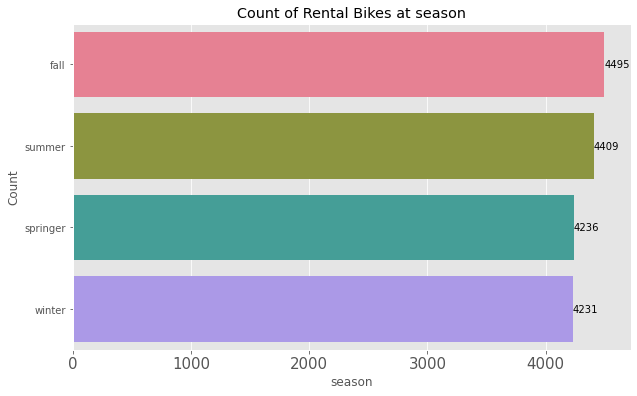

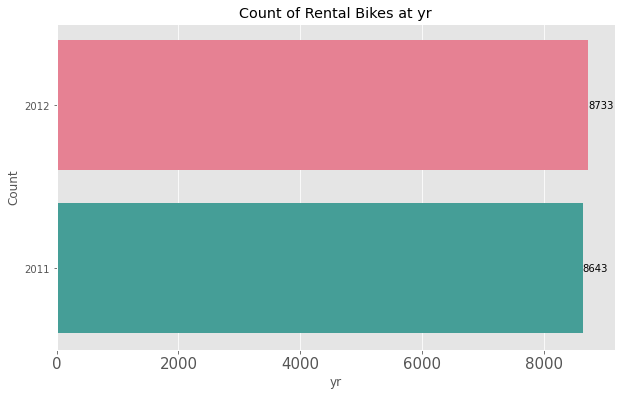

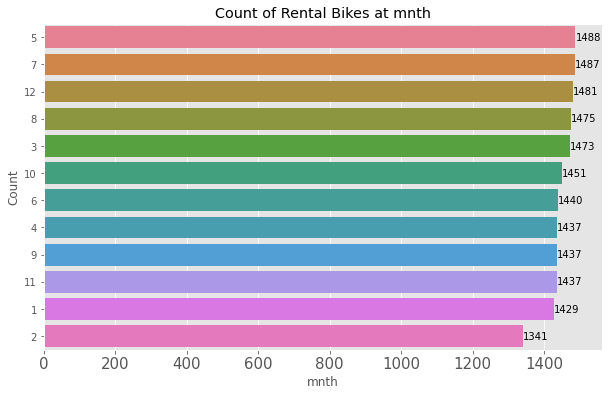

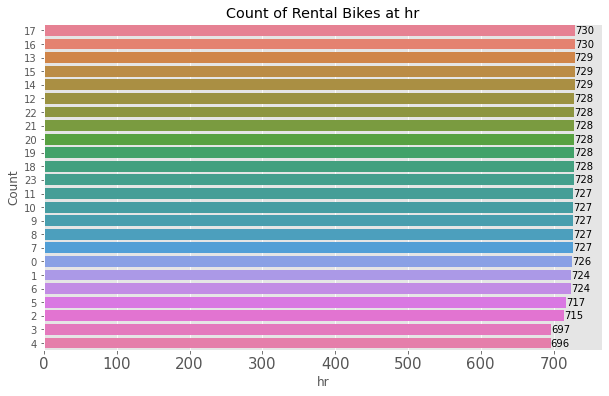

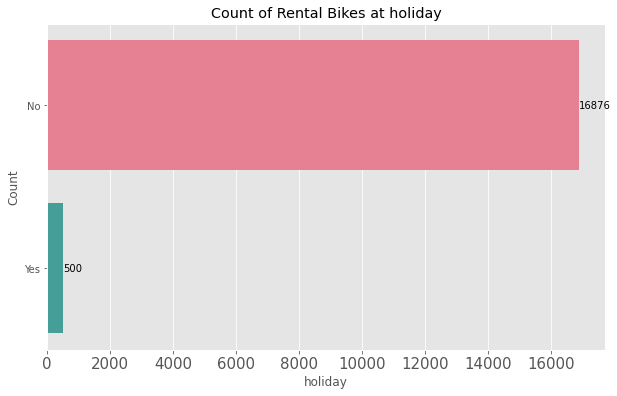

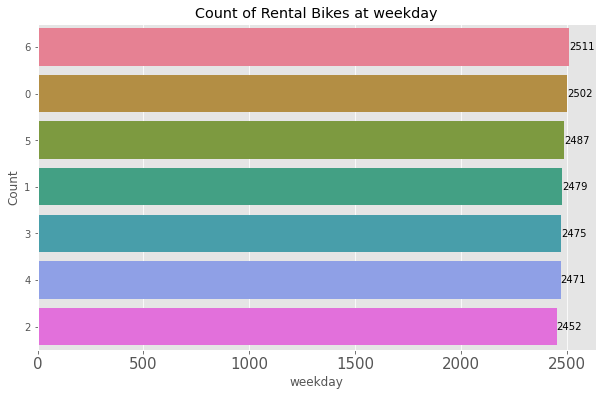

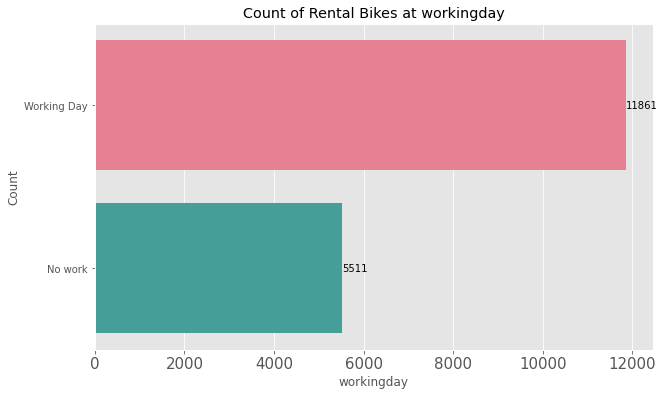

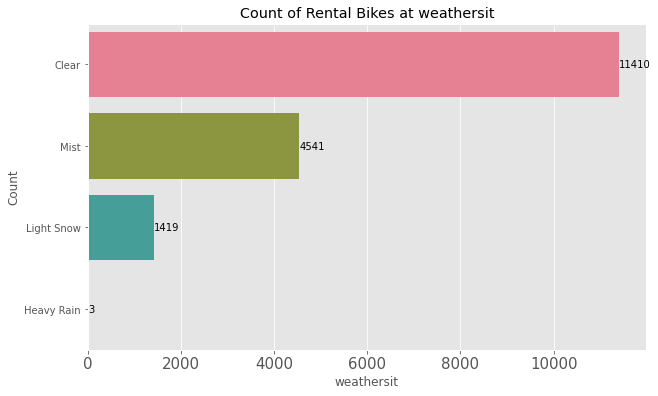

In [131]:
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    order = df[col].value_counts().index.tolist()[::1]
    ax = sns.countplot(y=col, data=df,palette='husl',order=order)
    plt.xticks(fontsize=15);
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'Count of Rental Bikes at {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<font color='brown'><b><I>Count of rental bikes at different seasons, year, month, hour, weekday, holiday, workingday and weather condition has been shown above.

#### <font color='maroon'><b>Line plot :

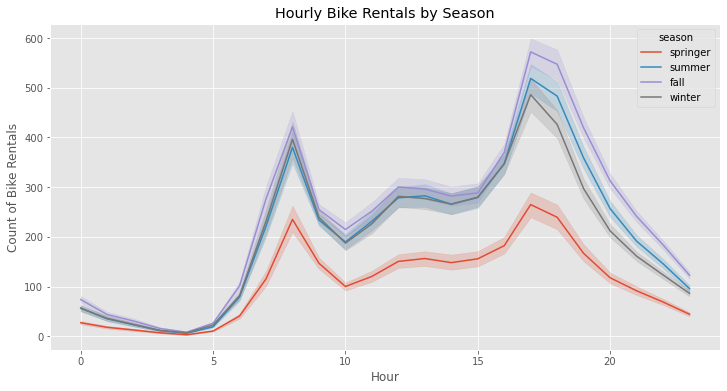

In [126]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='season', data=df)
plt.title('Hourly Bike Rentals by Season')
plt.xlabel('Hour')
plt.ylabel('Count of Bike Rentals')
plt.show()

<font color='brown'><b><I>From the plot, among the seasons, fall has the highest bike rental count, summer is next to it followed by winter, spring has the lowest bike rental count.

### <font color='purple'><b>Feature Engineering :